In [62]:
from pandas import read_csv
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from keras.layers.recurrent import LSTM
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from matplotlib import pyplot as plt

In [63]:
df = pd.read_csv(
    '../input/full-scale-waste-water-treatment-plant-data/Data-Melbourne_F_fixed.csv', index_col = 'Unnamed: 0')

In [64]:
df

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,5.068,4.716,305938.0,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2,2019.0,6.0,20.0
1378,5.882,5.510,293446.0,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9,2019.0,6.0,24.0
1379,4.638,4.811,307968.0,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9,2019.0,6.0,25.0
1380,5.373,4.929,316675.0,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2,2019.0,6.0,26.0


In [65]:
df=df.drop(['Year', 'Day', 'Month'], axis=1)

In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 1381
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Outflow           1382 non-null   float64
 1   Average Inflow            1382 non-null   float64
 2   Energy Consumption        1382 non-null   float64
 3   Ammonia                   1382 non-null   float64
 4   Biological Oxygen Demand  1382 non-null   float64
 5   Chemical Oxygen Demand    1382 non-null   float64
 6   Total Nitrogen            1382 non-null   float64
 7   Average Temperature       1382 non-null   float64
 8   Maximum temperature       1382 non-null   float64
 9   Minimum temperature       1382 non-null   float64
 10  Atmospheric pressure      1382 non-null   float64
 11  Average humidity          1382 non-null   float64
 12  Total rainfall            1382 non-null   float64
 13  Average visibility        1382 non-null   float64
 14  Average 

In [67]:
df.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000


In [68]:
df.isnull().sum()

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
dtype: int64

In [69]:
X = df.drop('Energy Consumption', axis = 1)
y = df['Energy Consumption']

In [70]:
X

,Average Outflow,Average Inflow,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
0,2.941,2.589,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5
1,2.936,2.961,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8
2,2.928,3.225,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1
3,2.928,3.354,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9
4,2.917,3.794,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,5.068,4.716,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2
1378,5.882,5.510,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9
1379,4.638,4.811,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9
1380,5.373,4.929,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2


In [71]:
y

0       175856.0
1       181624.0
2       202016.0
3       207547.0
4       202824.0
          ...   
1377    305938.0
1378    293446.0
1379    307968.0
1380    316675.0
1381    318268.0
Name: Energy Consumption, Length: 1382, dtype: float64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [73]:
X_train.shape

(1105, 15)

In [74]:
scaler = StandardScaler()

In [75]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
X_train

array([[ 1.11865137, -0.02292582, -0.9637957 , ..., -0.52020782,
         3.1515705 ,  1.54020553],
       [-0.22156805, -0.33471701, -0.43931151, ...,  0.03961302,
         0.35896975,  0.28737519],
       [-0.70273404,  0.21634002,  0.47853581, ...,  0.03961302,
        -1.24081159, -1.14565677],
       ...,
       [ 1.94247801,  2.2897514 ,  0.34741477, ...,  0.03961302,
        -0.4970536 , -0.66511911],
       [-0.75397302, -0.73191187,  1.00302   , ...,  0.03961302,
        -0.4970536 , -0.03012291],
       [ 0.56302874,  0.19600581,  1.00302   , ...,  0.03961302,
        -0.18832387, -0.82815867]])

In [77]:
y_train.shape

(1105,)

In [78]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1105, 15, 1)

In [79]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(277, 15, 1)

In [80]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Conv1D(32, 2, activation="relu", input_shape=(15, 1)),
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
#     optimizer=Adam(learning_rate=learning_rate), 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=600, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/600
14/14 [==============================] - 1s 23ms/step - loss: 145.8643 - mean_squared_logarithmic_error: 145.6310 - val_loss: 124.2564 - val_mean_squared_logarithmic_error: 124.3142
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 102.2976 - mean_squared_logarithmic_error: 102.0339 - val_loss: 80.1867 - val_mean_squared_logarithmic_error: 80.2305
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 68.3892 - mean_squared_logarithmic_error: 68.2558 - val_loss: 56.9307 - val_mean_squared_logarithmic_error: 56.9664
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 50.6036 - mean_squared_logarithmic_error: 50.5335 - val_loss: 44.0735 - val_mean_squared_logarithmic_error: 44.1032
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 40.1588 - mean_squared_logarithmic_error: 40.1051 - val_loss: 35.9254 - val_mean_squared_logarithmic_error: 35.9514
Epoch 6/600
14/14 [=============================

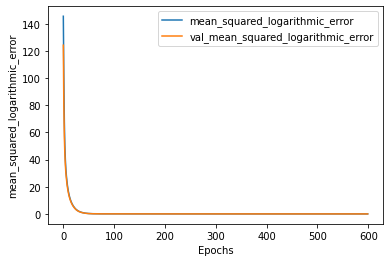

In [81]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [82]:
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[[269996.  ]
  [277543.22]
  [284513.5 ]
  [287662.44]
  [287700.88]
  [277064.28]
  [273053.  ]
  [272590.66]
  [271433.97]
  [265327.9 ]
  [269009.78]
  [270994.25]
  [270865.88]
  [270885.34]]

 [[269643.84]
  [271988.47]
  [276207.03]
  [274420.75]
  [274587.53]
  [278953.4 ]
  [277679.28]
  [279992.16]
  [274328.28]
  [267756.66]
  [270104.53]
  [270796.62]
  [275801.38]
  [279457.22]]

 [[274076.75]
  [271897.7 ]
  [273240.47]
  [275744.7 ]
  [273220.72]
  [270931.9 ]
  [269675.28]
  [271335.3 ]
  [271433.97]
  [271241.94]
  [271668.53]
  [270796.62]
  [275022.97]
  [276814.66]]

 [[265306.28]
  [271688.3 ]
  [276503.8 ]
  [269031.34]
  [266630.1 ]
  [271148.78]
  [272519.4 ]
  [272276.84]
  [271433.97]
  [271241.94]
  [271668.53]
  [273619.5 ]
  [267229.2 ]
  [265163.16]]

 [[274152.16]
  [270377.5 ]
  [270273.9 ]
  [266489.3 ]
  [269410.5 ]
  [276505.47]
  [278497.8 ]
  [279543.12]
  [273846.62]
  [268802.22]
  [270573.75]
  [270796.62]
  [274315.34]
  [

In [83]:
X = df.drop('Chemical Oxygen Demand', axis = 1)
y = df['Chemical Oxygen Demand']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [85]:
scaler = StandardScaler()

In [86]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1105, 15, 1)

In [88]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(277, 15, 1)

In [89]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Conv1D(32, 2, activation="relu", input_shape=(15, 1)),
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
#     optimizer=Adam(learning_rate=learning_rate), 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=600, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 39.2170 - mean_squared_logarithmic_error: 39.0961 - val_loss: 27.9291 - val_mean_squared_logarithmic_error: 28.0587
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 18.5860 - mean_squared_logarithmic_error: 18.4804 - val_loss: 9.9534 - val_mean_squared_logarithmic_error: 10.0365
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 6.5675 - mean_squared_logarithmic_error: 6.5307 - val_loss: 3.5695 - val_mean_squared_logarithmic_error: 3.6165
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 2.4819 - mean_squared_logarithmic_error: 2.4686 - val_loss: 1.4242 - val_mean_squared_logarithmic_error: 1.4502
Epoch 5/600
14/14 [==============================] - 0s 17ms/step - loss: 1.0523 - mean_squared_logarithmic_error: 1.0486 - val_loss: 0.6498 - val_mean_squared_logarithmic_error: 0.6636
Epoch 6/600
14/14 [==============================] - 0s 9ms/step 

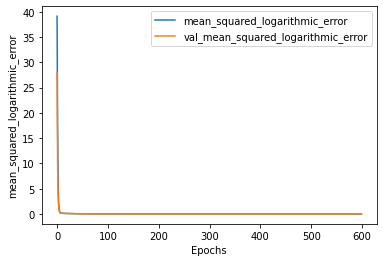

In [90]:

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [91]:
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[[852.8205 ]
  [853.5896 ]
  [836.6021 ]
  [764.3186 ]
  [725.36743]
  [804.71765]
  [841.7287 ]
  [840.41766]
  [843.3857 ]
  [855.07166]
  [853.22394]
  [845.4021 ]
  [846.8855 ]
  [846.43243]]

 [[853.3515 ]
  [855.4597 ]
  [850.4863 ]
  [838.2495 ]
  [820.43164]
  [820.688  ]
  [803.69604]
  [812.035  ]
  [827.1302 ]
  [854.33496]
  [850.65375]
  [846.2355 ]
  [842.80664]
  [807.45416]]

 [[837.4323 ]
  [837.9671 ]
  [839.85333]
  [844.2746 ]
  [838.73096]
  [845.68823]
  [851.824  ]
  [848.97284]
  [843.3857 ]
  [845.7504 ]
  [844.92   ]
  [846.2355 ]
  [843.9429 ]
  [820.7462 ]]

 [[886.7147 ]
  [833.9869 ]
  [823.5718 ]
  [827.80347]
  [847.66235]
  [847.6498 ]
  [841.1835 ]
  [842.55566]
  [843.3857 ]
  [845.7504 ]
  [844.92   ]
  [842.35864]
  [849.3135 ]
  [874.43066]]

 [[833.45386]
  [854.44147]
  [869.0338 ]
  [850.3249 ]
  [846.0987 ]
  [839.6082 ]
  [808.96423]
  [806.5081 ]
  [830.0101 ]
  [854.06616]
  [851.177  ]
  [846.2355 ]
  [844.53394]
  [

In [92]:
X = df.drop('Biological Oxygen Demand', axis = 1)
y = df['Biological Oxygen Demand']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [94]:
scaler = StandardScaler()

In [95]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1105, 15, 1)

In [97]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(277, 15, 1)

In [98]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Conv1D(32, 2, activation="relu", input_shape=(15, 1)),
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
#     optimizer=Adam(learning_rate=learning_rate), 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=600, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/600
14/14 [==============================] - 1s 23ms/step - loss: 29.3511 - mean_squared_logarithmic_error: 29.2364 - val_loss: 19.5004 - val_mean_squared_logarithmic_error: 19.5429
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 12.0609 - mean_squared_logarithmic_error: 11.9829 - val_loss: 5.6316 - val_mean_squared_logarithmic_error: 5.6569
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 3.3454 - mean_squared_logarithmic_error: 3.3224 - val_loss: 1.5151 - val_mean_squared_logarithmic_error: 1.5256
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.9584 - mean_squared_logarithmic_error: 0.9524 - val_loss: 0.4848 - val_mean_squared_logarithmic_error: 0.4875
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3672 - mean_squared_logarithmic_error: 0.3661 - val_loss: 0.2452 - val_mean_squared_logarithmic_error: 0.2442
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - l

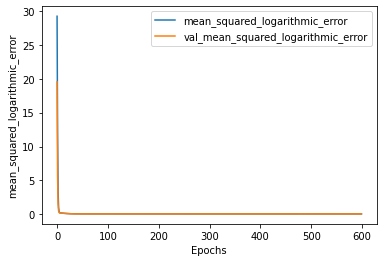

In [99]:

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [100]:
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[[386.1495 ]
  [381.52515]
  [376.53726]
  [344.31335]
  [298.4742 ]
  [368.84805]
  [381.05008]
  [381.45547]
  [381.72653]
  [374.98267]
  [380.55066]
  [381.83316]
  [381.6099 ]
  [381.68427]]

 [[384.63742]
  [382.5387 ]
  [381.90665]
  [381.207  ]
  [380.27353]
  [375.8903 ]
  [363.4212 ]
  [372.5251 ]
  [376.54132]
  [381.0293 ]
  [383.29913]
  [381.92697]
  [380.5714 ]
  [366.62042]]

 [[380.91415]
  [380.83865]
  [381.2058 ]
  [380.62985]
  [379.8715 ]
  [381.85464]
  [382.06638]
  [381.09656]
  [381.72653]
  [381.53638]
  [381.40637]
  [381.92697]
  [380.6932 ]
  [374.19315]]

 [[394.52322]
  [367.9517 ]
  [375.648  ]
  [383.43466]
  [396.21503]
  [381.04022]
  [381.40134]
  [381.36575]
  [381.72653]
  [381.53638]
  [381.40637]
  [380.6709 ]
  [379.28156]
  [397.13522]]

 [[380.57742]
  [374.4725 ]
  [385.36783]
  [387.50226]
  [382.66565]
  [380.23602]
  [366.993  ]
  [365.9051 ]
  [376.56845]
  [381.2593 ]
  [384.4498 ]
  [381.92697]
  [380.8051 ]
  [